# Notebook D: Plots of GSM Data
This Jupyter notebook generates plots of data from this genome scale model analysis of <i>Y. lipolytica</i> when metabolizing glucose, glycerol, and oleic acid. 

### Key Functions
`plot_rxn_gsm_bounds_grid`: This function plots the reaction bounds from the FVA with the GSM and biomass constraint, <sup>13</sup>C-MFA, and FVA with the GSM and <sup>13</sup>C-MFA constraints

`plot_side_by_side_histograms`: This function plots histograms of the size of reaction bounds in the GSM when either the biomass constraint, or <sup>13</sup>C-MFA constraint string are used


### Load imports

In [1]:
import cobra
import pandas as pd

import sys
source_dir = '../src'
sys.path.append(source_dir)

from plotting.plot_rxn_gsm_bounds_grid import plot_rxn_gsm_bounds_grid
from plotting.plot_side_by_side_histograms import plot_side_by_side_histograms

### Load the genome scale model

In [2]:
model = cobra.io.json.load_json_model('../genome_scale_models/iYLI647_corr_3.json')

### Keep reaction ids consistent

In [3]:
model.reactions.get_by_id('EX_glc(e)').id  = 'EX_glc_e'
model.reactions.get_by_id('EX_glyc(e)').id = 'EX_glyc_e'
model.reactions.get_by_id('EX_ocdcea(e)').id = 'EX_ocdcea_e'
model.reactions.get_by_id('EX_h2o(e)').id = 'EX_h2o_e'
model.reactions.get_by_id('EX_h(e)').id = 'EX_h_e'
model.reactions.get_by_id('EX_nh4(e)').id = 'EX_nh4_e'
model.reactions.get_by_id('EX_o2(e)').id = 'EX_o2_e'
model.reactions.get_by_id('EX_pi(e)').id = 'EX_pi_e'
model.reactions.get_by_id('EX_so4(e)').id = 'EX_so4_e'

# print an example reaction
model.reactions.get_by_id('EX_glc_e')

Reaction identifier,EX_glc_e
Name,D Glucose exchange
Memory address,0x134b33850
Stoichiometry,glc_D[e] <=> D_Glucose <=>
GPR,YALI0D01111g or YALI0D18876g or YALI0D00132g or YALI0B01342g or YALI0E23287g or YALI0B00396g or...
Lower bound,-10.0
Upper bound,1000.0


### Load Central Flux Data

In [4]:
# open biomass cutoff data and 13C-MFA bound data
biomass_cutoff_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_bounds_from_gsm.csv')
mfa_constrainted_gsm_central_df = pd.read_csv('../results/central_fluxes/mfa_constrained_gsm_central_bounds.csv')

display(biomass_cutoff_gsm_central_df.head())
display(mfa_constrainted_gsm_central_df.head())

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Oleic Acid MFA UB,Glucose GSM LB,Glucose GSM UB,Glucose_mfa_bound_feasibility,Glycerol GSM LB,Glycerol GSM UB,Glycerol_mfa_bound_feasibility,Oleic Acid GSM LB,Oleic Acid GSM UB,Oleic Acid_mfa_bound_feasibility
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,NaN,100.000000,100.000000,fully feasible,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,NaN,-26.574563,-0.000000,NaN,100.000000,100.000000,fully feasible,-67.583966,-0.000000,NaN
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,100.000,0.000000,-0.000000,NaN,0.000000,-0.000000,NaN,100.000000,100.000000,fully feasible
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-256.517,-190.412199,92.008809,fully feasible,-96.832349,-3.061031,fully feasible,-549.764335,-24.440384,fully feasible


,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA UB,Oleic Acid MFA Flux,Oleic Acid MFA LB,Oleic Acid MFA UB,Glucose MFA-Constrained GSM LB,Glucose MFA-Constrained GSM UB,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,NaN,NaN,NaN,NaN,100.00000,100.0000,0.000000,-0.000000,0.000000,-0.000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,-6.27350,-0.0000,100.000000,100.000000,-0.063537,-0.000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,100.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,NaN,100.0000,100.0000,100.000,0.00000,-0.0000,0.000000,-0.000000,100.000000,100.000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.5906,-305.8491,-319.0201,-256.517,21.59084,23.5403,-36.776517,-31.998287,-257.125896,-256.517


In [5]:
central_rxn_df = mfa_constrainted_gsm_central_df.copy()

# add columns from biomass_cutoff_gsm_central_df to mfa_constrainted_gsm_central_df
central_rxn_df['Glucose Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glucose GSM LB']
central_rxn_df['Glucose Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glucose GSM UB']

central_rxn_df['Glycerol Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Glycerol GSM LB']
central_rxn_df['Glycerol Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Glycerol GSM UB']

central_rxn_df['Oleic Acid Biomass Cutoff GSM LB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM LB']
central_rxn_df['Oleic Acid Biomass Cutoff GSM UB'] = biomass_cutoff_gsm_central_df['Oleic Acid GSM UB']

central_rxn_df.head()

,Unnamed: 0,Pathway,ID,Equation,reaction_ids,Location on map,Glucose MFA Flux,Glucose MFA LB,Glucose MFA UB,Glycerol MFA Flux,...,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB,Glucose Biomass Cutoff GSM LB,Glucose Biomass Cutoff GSM UB,Glycerol Biomass Cutoff GSM LB,Glycerol Biomass Cutoff GSM UB,Oleic Acid Biomass Cutoff GSM LB,Oleic Acid Biomass Cutoff GSM UB
0,0,uptake,gluc uptake,Glucose + ATP -> G6P,reverse_EX_glc_e,"(-1180, 1175)",100.0000,100.000,100.0000,NaN,...,0.000000,-0.000000,0.000000,-0.000,100.000000,100.000000,0.000000,-0.000000,0.000000,-0.000000
1,1,uptake,glyc uptake,Glycerol -> GLYC,reverse_GLYCt,"(-1376, 417)",NaN,NaN,NaN,100.0000,...,100.000000,100.000000,-0.063537,-0.000,-26.574563,-0.000000,100.000000,100.000000,-67.583966,-0.000000
2,2,uptake,R3.2,GLYC + ATP -> DHAP + 1.5*ATP,NaN,NaN,NaN,NaN,NaN,100.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,uptake,OA uptake,OA + ATP -> 9*ACCOAcyt + 8*NADH + 12*ATP,OCDCEAt,"(-55, 111)",NaN,NaN,NaN,NaN,...,0.000000,-0.000000,100.000000,100.000,0.000000,-0.000000,0.000000,-0.000000,100.000000,100.000000
4,4,glycolysis/gluconeogensis,R4 net,G6P <-> F6P,PGI,"(-1180, 960)",18.0175,9.792,23.5403,-41.3947,...,-36.776517,-31.998287,-257.125896,-256.517,-190.412199,92.008809,-96.832349,-3.061031,-549.764335,-24.440384


### Plot Glucose GSM and MFA flux bounds 

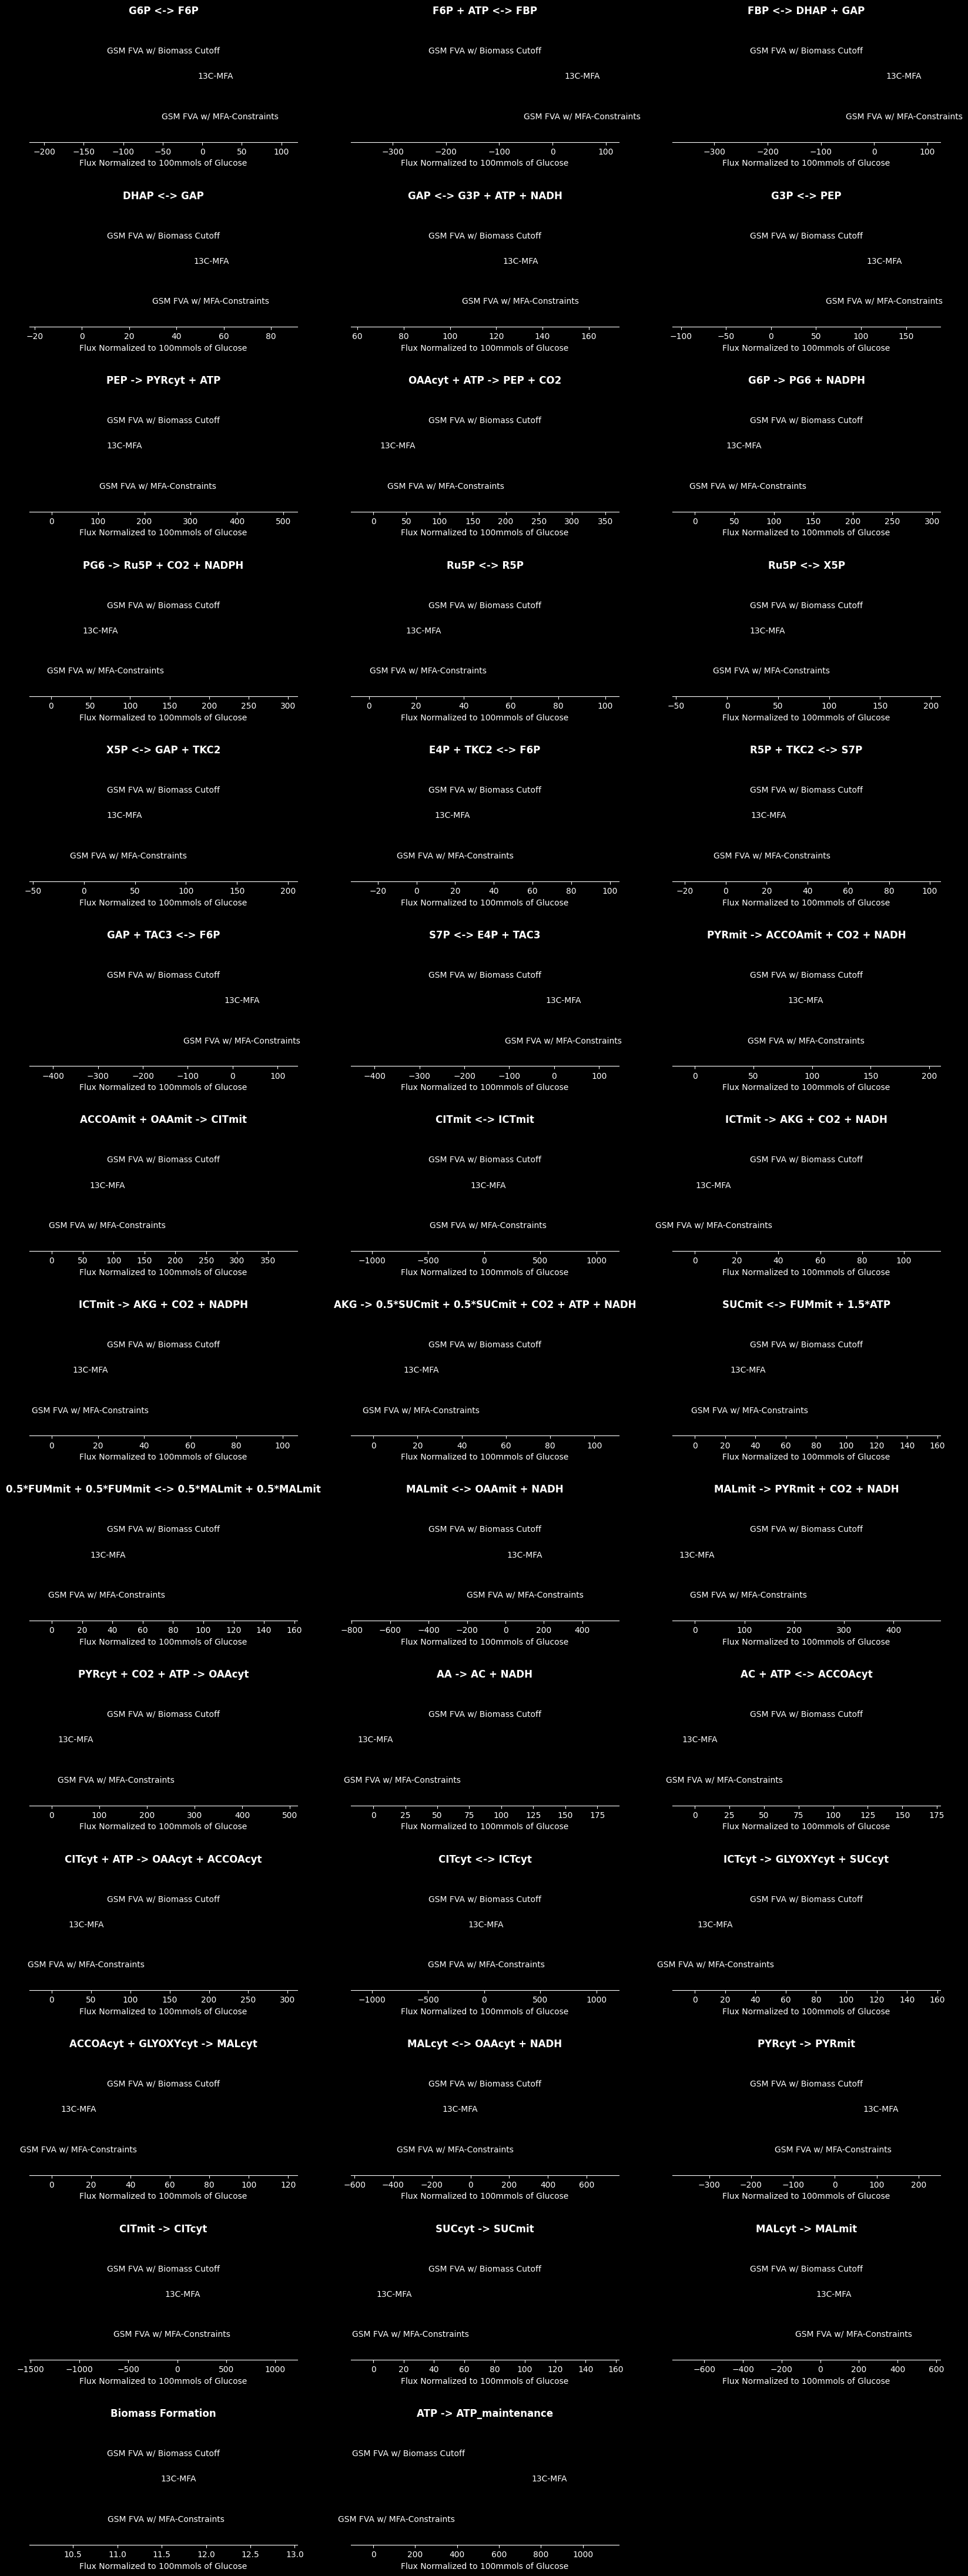

In [6]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glucose')

### Plot Glycerol GSM and MFA flux bounds 

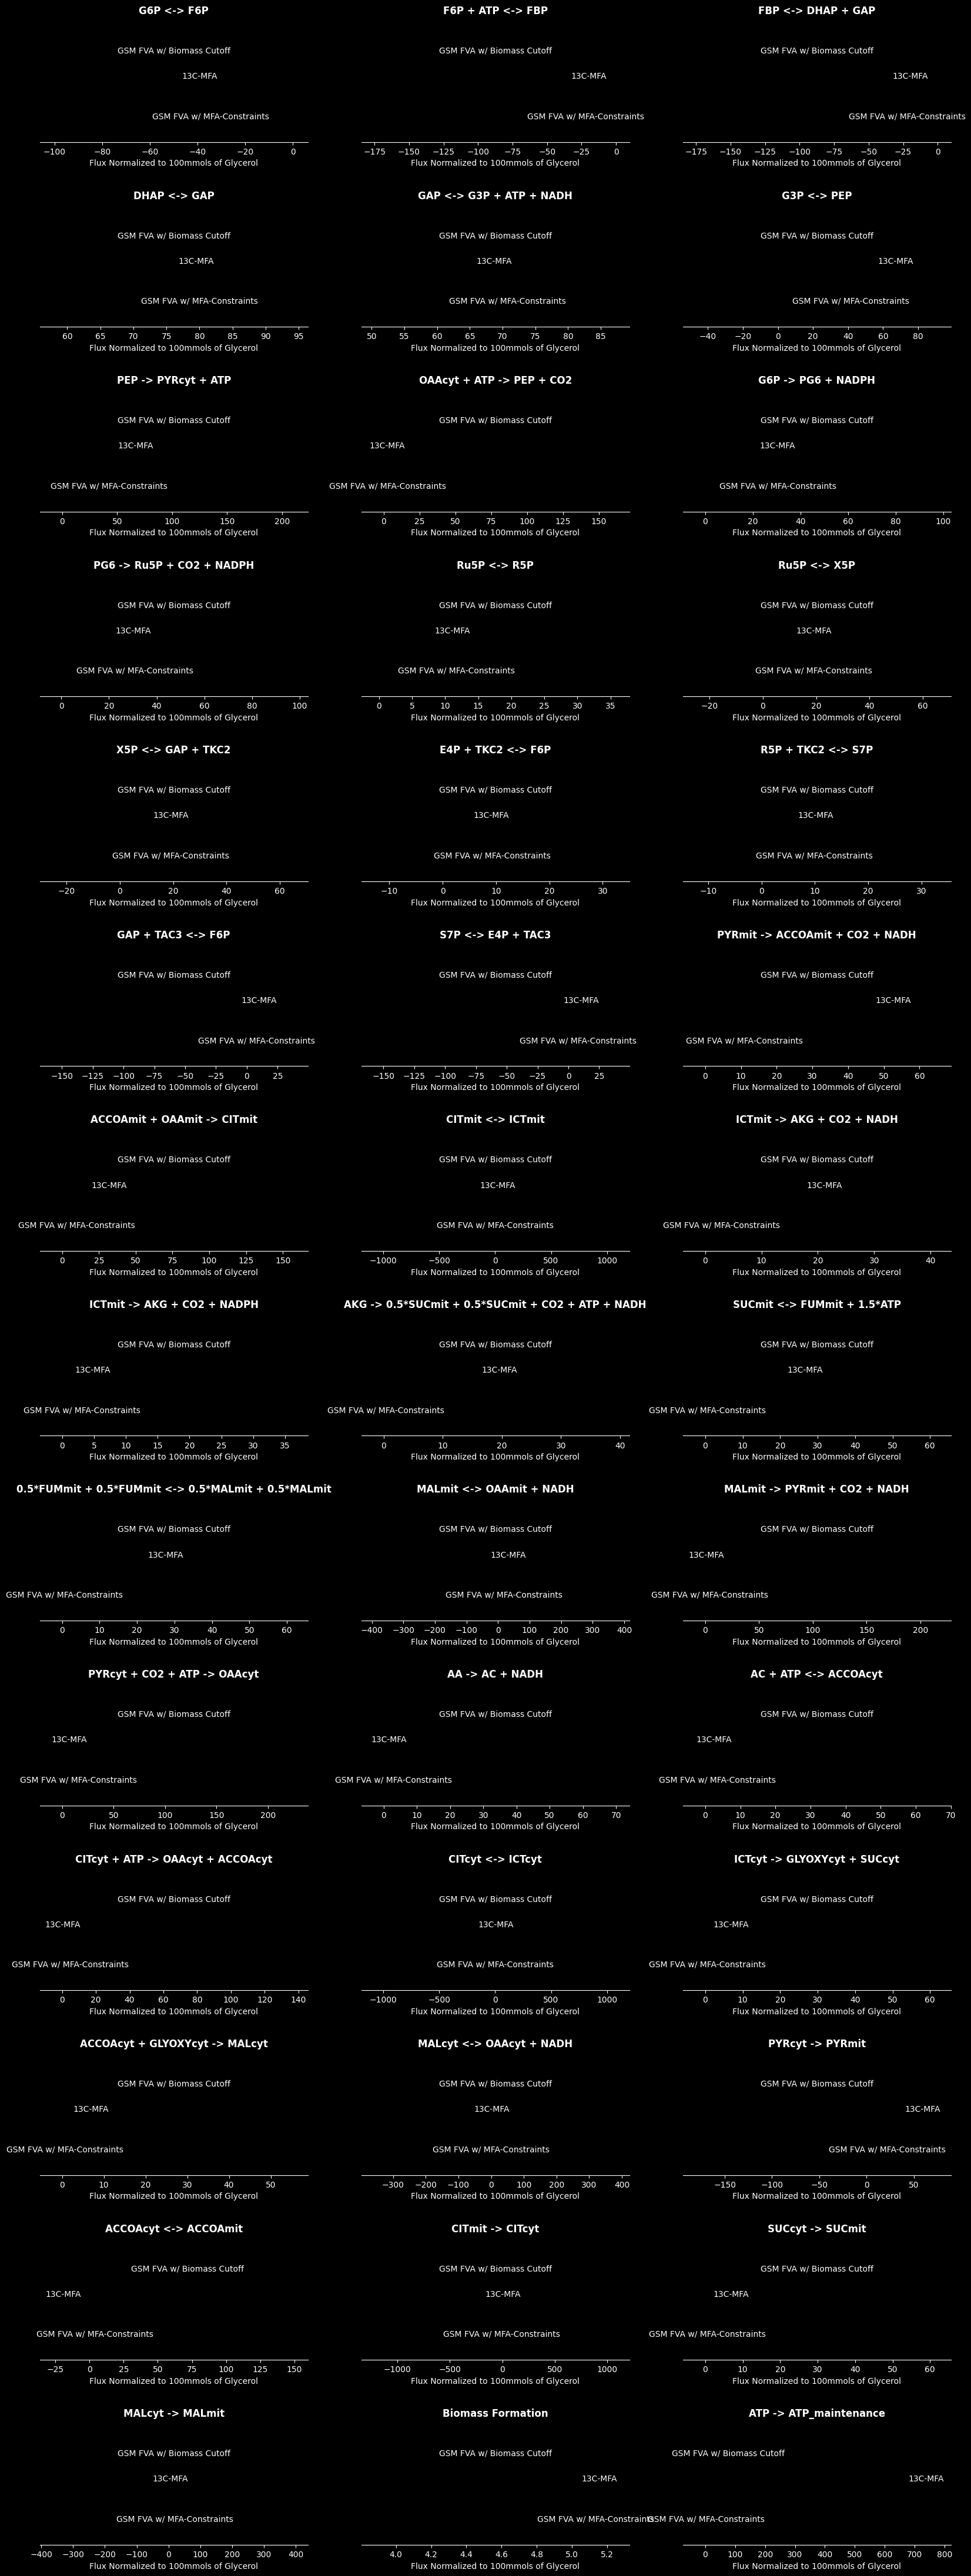

In [7]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Glycerol')

### Plot Oleic Acid GSM and MFA flux bounds 

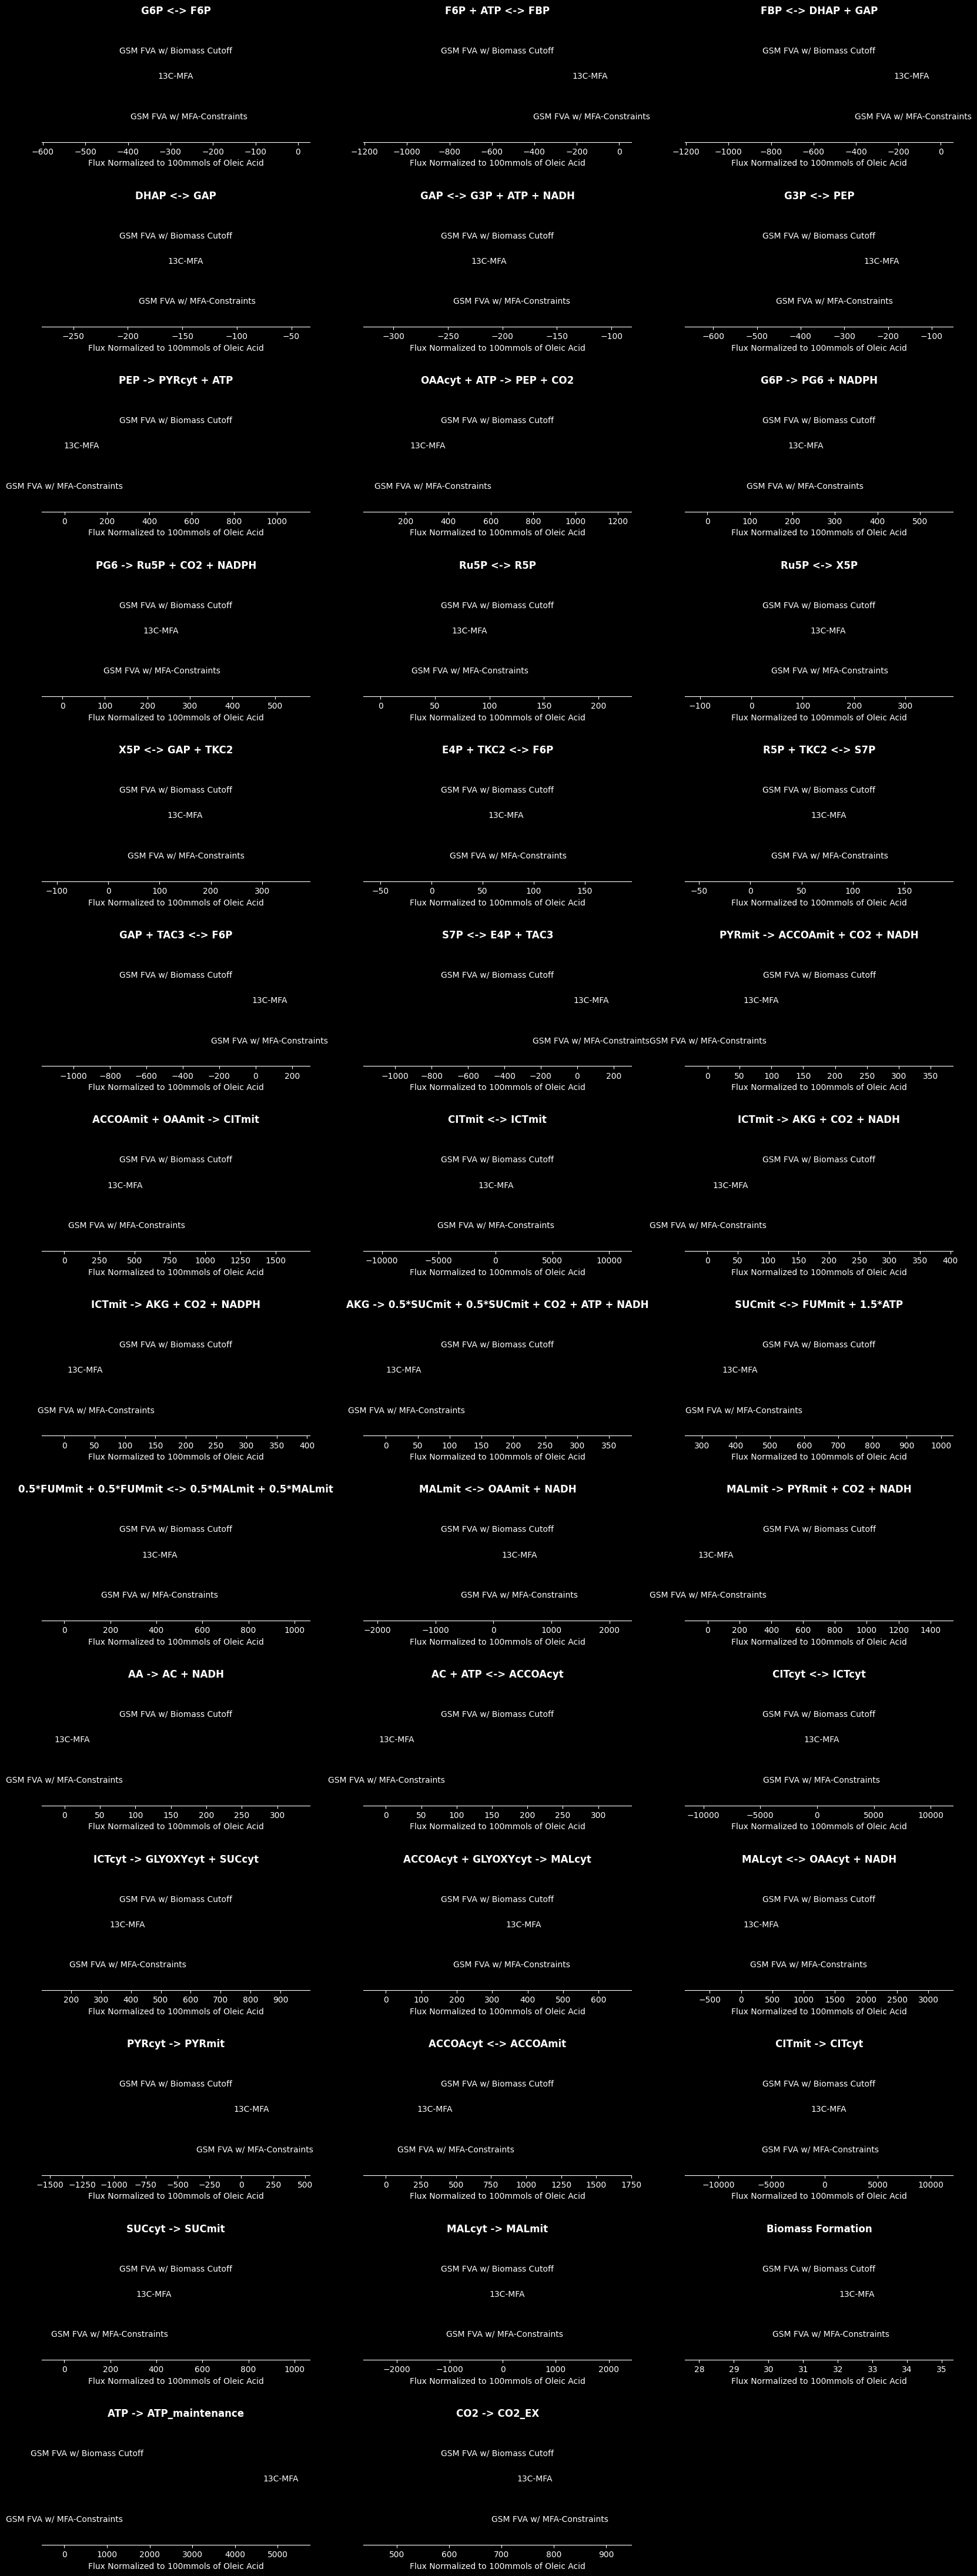

In [8]:
plot_rxn_gsm_bounds_grid(central_rxn_df=central_rxn_df, substrate='Oleic Acid')

## Plot GSM Bound Histograms

In [9]:
# load biomass bound gsm fluxes
glucose_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glucose_biomass_bound_gsm_fluxes.csv')
glycerol_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glycerol_biomass_bound_gsm_fluxes.csv')
oleic_acid_biomass_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_biomass_bound_gsm_fluxes.csv')

# load mfa bound gsm fluxes
glucose_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glucose_mfa_bound_gsm_fluxes.csv')
glycerol_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/glycerol_mfa_bound_gsm_fluxes.csv')
oleic_acid_mfa_bound_gsm_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_mfa_bound_gsm_fluxes.csv')

oleic_acid_biomass_bound_gsm_df

,reaction_id,reaction_name,full_reaction,Oleic Acid Biomass-Constrained GSM flux,Oleic Acid Biomass-Constrained GSM LB,Oleic Acid Biomass-Constrained GSM UB
0,13BGH,Endo 1 3 beta glucan glucohydrase,13BDglcn[c] + h2o[c] --> glc_D[c],0.000000,0.000000,525.947962
1,13BGHe,Exo 1 3 beta glucan glucohydrase,13BDglcn[e] + h2o[e] --> glc_D[e],0.000000,0.000000,-0.000000
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,6.819378,5.552455,231.425183
3,2DDA7Ptm,2 Dehydro 3 deoxy D arabino heptonate7 phohsph...,2dda7p[c] <=> 2dda7p[m],0.000000,-67.049936,-0.000000
4,2DHPtm,2 Dehydropantoate mitochondrial transport,2dhp[c] <=> 2dhp[m],0.000000,0.000000,27.426414
...,...,...,...,...,...,...
1346,EX_eryth(e),EX_eryth(e),erythritol[e] -->,0.000000,0.000000,63.578990
1347,EX_biom,EX_biom,biomass[c] -->,34.681573,28.238335,34.681573
1348,MALS,Malate synthase,accoa[c] + glx[c] + h2o[c] --> coa[c] + h[c] +...,195.747428,0.000000,629.652230
1349,biomass_glucose,NaN,0.6822317267700153 13BDglcn[c] + 0.55472655920...,0.000000,0.000000,-0.000000


In [10]:
# calculate the size of the biomass-constrained GSM bounds
glucose_biomass_bound_sizes = [row['Glucose Biomass-Constrained GSM UB'] - row['Glucose Biomass-Constrained GSM LB'] for _, row in glucose_biomass_bound_gsm_df.iterrows()]
glycerol_biomass_bound_sizes = [row['Glycerol Biomass-Constrained GSM UB'] - row['Glycerol Biomass-Constrained GSM LB'] for _, row in glycerol_biomass_bound_gsm_df.iterrows()]
oleic_acid_biomass_bound_sizes = [row['Oleic Acid Biomass-Constrained GSM UB'] - row['Oleic Acid Biomass-Constrained GSM LB'] for _, row in oleic_acid_biomass_bound_gsm_df.iterrows()]

# calculate the size of the MFA-constrained GSM bounds
glucose_mfa_bound_sizes = [row['Glucose MFA-Constrained GSM UB'] - row['Glucose MFA-Constrained GSM LB'] for _, row in glucose_mfa_bound_gsm_df.iterrows()]
glycerol_mfa_bound_sizes = [row['Glycerol MFA-Constrained GSM UB'] - row['Glycerol MFA-Constrained GSM LB'] for _, row in glycerol_mfa_bound_gsm_df.iterrows()]
oleic_acid_mfa_bound_sizes = [row['Oleic Acid MFA-Constrained GSM UB'] - row['Oleic Acid MFA-Constrained GSM LB'] for _, row in oleic_acid_mfa_bound_gsm_df.iterrows()]


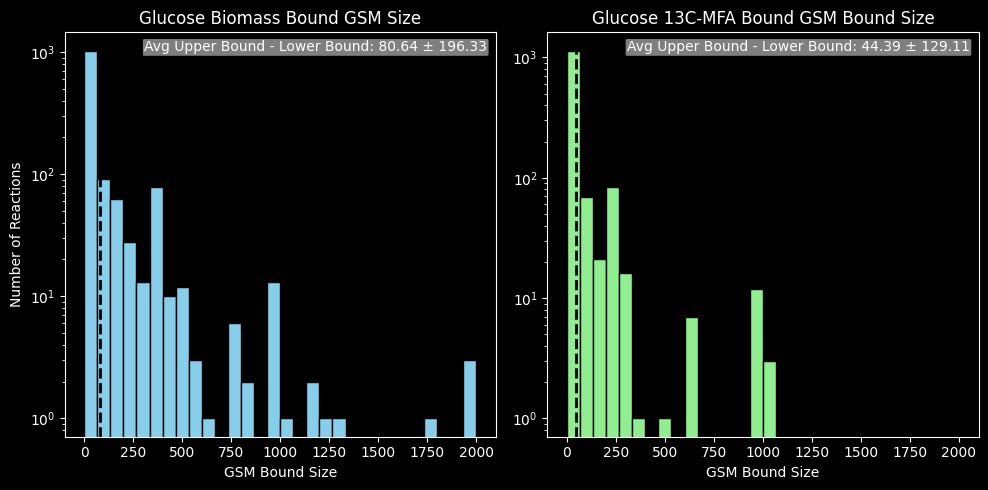

In [11]:
plot_side_by_side_histograms(glucose_biomass_bound_sizes, glucose_mfa_bound_sizes , 'Glucose Biomass Bound GSM Size', 'Glucose 13C-MFA Bound GSM Bound Size')

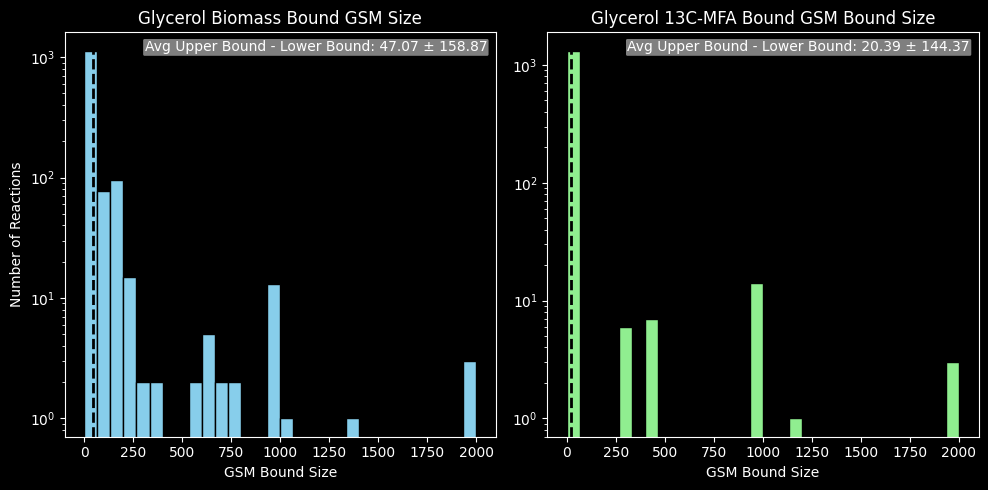

In [12]:
plot_side_by_side_histograms(glycerol_biomass_bound_sizes, glycerol_mfa_bound_sizes , 'Glycerol Biomass Bound GSM Size', 'Glycerol 13C-MFA Bound GSM Bound Size')

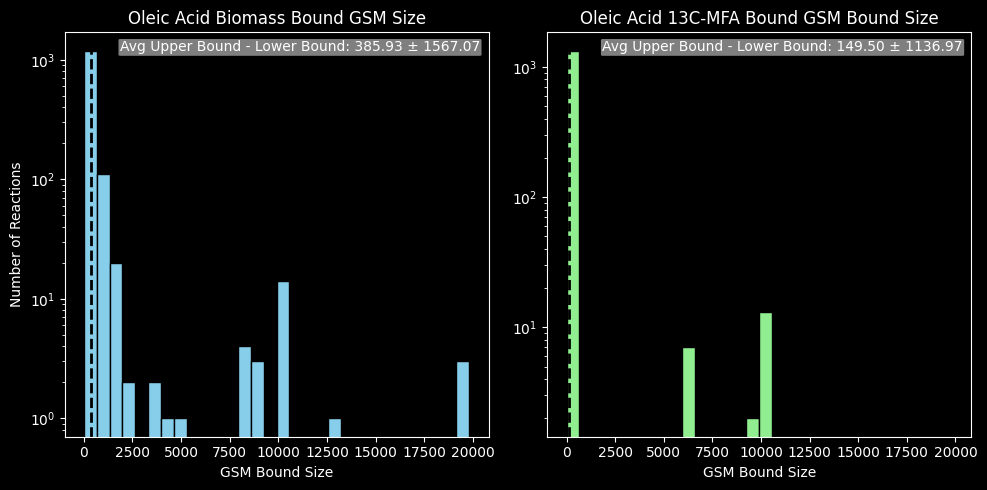

In [13]:
plot_side_by_side_histograms(oleic_acid_biomass_bound_sizes, oleic_acid_mfa_bound_sizes , 'Oleic Acid Biomass Bound GSM Size', 'Oleic Acid 13C-MFA Bound GSM Bound Size')

## Plot sources and sinks figure

### Load GSM data files

In [14]:
# load results/gsm_fluxes/glucose_gsm_fluxes.csv
glucose_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/glucose_mfa_bound_gsm_fluxes.csv')
glycerol_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/glycerol_mfa_bound_gsm_fluxes.csv')
oleic_acid_gsm_fluxes_df = pd.read_csv('../results/gsm_fluxes/oleic_acid_mfa_bound_gsm_fluxes.csv')

oleic_acid_gsm_fluxes_df

,reaction_id,reaction_name,full_reaction,Oleic Acid MFA-Constrained GSM flux,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB
0,13BGH,Endo 1 3 beta glucan glucohydrase,13BDglcn[c] + h2o[c] --> glc_D[c],0.000000,0.000000,0.456672
1,13BGHe,Exo 1 3 beta glucan glucohydrase,13BDglcn[e] + h2o[e] --> glc_D[e],0.000000,0.000000,-0.000000
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,6.251885,6.250616,6.598557
3,2DDA7Ptm,2 Dehydro 3 deoxy D arabino heptonate7 phohsph...,2dda7p[c] <=> 2dda7p[m],0.000000,-2.342634,-0.000000
4,2DHPtm,2 Dehydropantoate mitochondrial transport,2dhp[c] <=> 2dhp[m],0.000000,0.000000,0.027469
...,...,...,...,...,...,...
1346,EX_eryth(e),EX_eryth(e),erythritol[e] -->,0.000000,0.000000,0.061401
1347,EX_biom,EX_biom,biomass[c] -->,31.795453,31.789000,31.795453
1348,MALS,Malate synthase,accoa[c] + glx[c] + h2o[c] --> coa[c] + h[c] +...,354.773000,354.773000,355.816822
1349,biomass_glucose,NaN,0.6822317267700153 13BDglcn[c] + 0.55472655920...,0.000000,0.000000,-0.000000


### Determine all NADPH reactions

In [15]:
nadph_rxn_ids = [r.id for r in model.reactions if 'nadph[c]' in r.reaction]

print(f'There are {len(nadph_rxn_ids)} reactions that produce or consume NADPH')

nadph_rxn_ids[:5]


There are 71 reactions that produce or consume NADPH


['ASADi', '3DSPHR', 'AASAD1', 'ADHAPR_SC', 'ALCD19y']

In [19]:
# filter glucose_gsm_fluxes_df to only include NADPH reactions
glucose_gsm_nadph_fluxes_df = glucose_gsm_fluxes_df[glucose_gsm_fluxes_df['reaction_id'].isin(nadph_rxn_ids)]

# remove rows where the the lower bound and the upper bound are both 0
glucose_gsm_nadph_fluxes_df = glucose_gsm_nadph_fluxes_df[
    (glucose_gsm_nadph_fluxes_df['Glucose MFA-Constrained GSM LB'] != 0) |
    (glucose_gsm_nadph_fluxes_df['Glucose MFA-Constrained GSM UB'] != 0)
]

# sort by gsm flux value
glucose_gsm_nadph_fluxes_df = glucose_gsm_nadph_fluxes_df.sort_values(by='Glucose MFA-Constrained GSM flux', ascending=False)

glucose_gsm_nadph_fluxes_df.head()

,reaction_id,reaction_name,full_reaction,Glucose MFA-Constrained GSM flux,Glucose MFA-Constrained GSM LB,Glucose MFA-Constrained GSM UB
646,GND,phosphogluconate dehydrogenase,6pgc[c] + nadp[c] --> co2[c] + nadph[c] + ru5p...,67.708602,67.708602,69.707800
605,G6PDH2,glucose 6 phosphate dehydrogenase,g6p[c] + nadp[c] --> 6pgl[c] + h[c] + nadph[c],66.725741,65.587815,68.874191
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,4.215823,3.575628,47.544022
915,SACCD1,saccharopine dehydrogenase NADP L glutamate fo...,L2aadp6sa[c] + glu_L[c] + h[c] + nadph[c] <=> ...,3.357177,2.847372,12.226061
209,FAS100COA,fatty acyl CoA synthase n C100CoA,3.0 h[c] + malcoa[c] + 2.0 nadph[c] + occoa[c]...,2.946912,0.178721,8.785836


In [25]:
def classify_reaction(row):
    if row['Glucose MFA-Constrained GSM LB'] < 0 and row['Glucose MFA-Constrained GSM UB'] > 0:
        return 'Ambiguous'
    
    reaction = model.reactions.get_by_id(row['reaction_id'])
    nadph_metabolite = model.metabolites.get_by_id('nadph[c]')

    if nadph_metabolite in reaction.products:
        if row['Glucose MFA-Constrained GSM LB'] > 0:
            return 'Source'
        else:
            return 'Sink'
    else:
        if row['Glucose MFA-Constrained GSM UB'] < 0:
            return 'Sink'
        else:
            return 'Source'

In [26]:
for _, row in glucose_gsm_nadph_fluxes_df.iterrows():
    print(classify_reaction(row))

Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Ambiguous
Source
Sink
Source
Source
Source
Source
Source
Source
Source
Source
Source
Sink
Source
Source
Source
Sink
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Source
Sink
Sink
Ambiguous


In [17]:
# filter glycerol_gsm_fluxes_df to only include NADPH reactions
glycerol_gsm_nadph_fluxes_df = glycerol_gsm_fluxes_df[glycerol_gsm_fluxes_df['reaction_id'].isin(nadph_rxn_ids)]

# remove rows where the the lower bound and the upper bound are both 0
glycerol_gsm_nadph_fluxes_df = glycerol_gsm_nadph_fluxes_df[
    (glycerol_gsm_nadph_fluxes_df['Glycerol MFA-Constrained GSM LB'] != 0) |
    (glycerol_gsm_nadph_fluxes_df['Glycerol MFA-Constrained GSM UB'] != 0)
]

# sort by gsm flux value
glycerol_gsm_nadph_fluxes_df = glycerol_gsm_nadph_fluxes_df.sort_values(by='Glycerol MFA-Constrained GSM flux', ascending=False)

glycerol_gsm_nadph_fluxes_df

,reaction_id,reaction_name,full_reaction,Glycerol MFA-Constrained GSM flux,Glycerol MFA-Constrained GSM LB,Glycerol MFA-Constrained GSM UB
1318,MTHFD,methylenetetrahydrofolate dehydrogenase NADP,mlthf[c] + nadp[c] <=> methf[c] + nadph[c],35.223066,29.472047,35.740039
646,GND,phosphogluconate dehydrogenase,6pgc[c] + nadp[c] --> co2[c] + nadph[c] + ru5p...,31.920491,28.412834,33.191064
605,G6PDH2,glucose 6 phosphate dehydrogenase,g6p[c] + nadp[c] --> 6pgl[c] + h[c] + nadph[c],31.515516,28.010141,32.766400
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,4.503118,2.622592,5.614604
743,ICDHy,isocitrate dehydrogenase NADP,icit[c] + nadp[c] --> akg[c] + co2[c] + nadph[c],1.698868,0.000000,5.601700
915,SACCD1,saccharopine dehydrogenase NADP L glutamate fo...,L2aadp6sa[c] + glu_L[c] + h[c] + nadph[c] <=> ...,1.383279,1.375485,1.492757
234,FAS80COA_L,fatty acyl CoA synthase n C80CoA lumped reaction,accoa[c] + 9.0 h[c] + 3.0 malcoa[c] + 6.0 nadp...,1.214235,0.086335,1.397126
209,FAS100COA,fatty acyl CoA synthase n C100CoA,3.0 h[c] + malcoa[c] + 2.0 nadph[c] + occoa[c]...,1.214235,0.086335,1.397126
211,FAS120COA,fatty acyl CoA synthase n C120CoA,dcacoa[c] + 3.0 h[c] + malcoa[c] + 2.0 nadph[c...,1.192527,0.064751,1.375541
225,FAS140COA,fatty acyl CoA synthase n C140CoA,ddcacoa[c] + 3.0 h[c] + malcoa[c] + 2.0 nadph[...,1.127405,0.000000,1.310785


In [18]:
# filter oleic_acid_gsm_fluxes_df to only include NADPH reactions
oleic_acid_gsm_nadph_fluxes_df = oleic_acid_gsm_fluxes_df[oleic_acid_gsm_fluxes_df['reaction_id'].isin(nadph_rxn_ids)]

# remove rows where the the lower bound and the upper bound are both 0
oleic_acid_gsm_nadph_fluxes_df = oleic_acid_gsm_nadph_fluxes_df[
    (oleic_acid_gsm_nadph_fluxes_df['Oleic Acid MFA-Constrained GSM LB'] != 0) |
    (oleic_acid_gsm_nadph_fluxes_df['Oleic Acid MFA-Constrained GSM UB'] != 0)
]

# sort by gsm flux value
oleic_acid_gsm_nadph_fluxes_df = oleic_acid_gsm_nadph_fluxes_df.sort_values(by='Oleic Acid MFA-Constrained GSM flux', ascending=False)

oleic_acid_gsm_nadph_fluxes_df

,reaction_id,reaction_name,full_reaction,Oleic Acid MFA-Constrained GSM flux,Oleic Acid MFA-Constrained GSM LB,Oleic Acid MFA-Constrained GSM UB
646,GND,phosphogluconate dehydrogenase,6pgc[c] + nadp[c] --> co2[c] + nadph[c] + ru5p...,233.999515,233.999515,234.612981
605,G6PDH2,glucose 6 phosphate dehydrogenase,g6p[c] + nadp[c] --> 6pgl[c] + h[c] + nadph[c],228.997917,228.992270,229.612398
1319,MTHFR3,5 10 methylenetetrahydrofolatereductase NADPH,2.0 h[c] + mlthf[c] + nadph[c] --> 5mthf[c] + ...,10.268949,10.266865,10.301169
209,FAS100COA,fatty acyl CoA synthase n C100CoA,3.0 h[c] + malcoa[c] + 2.0 nadph[c] + occoa[c]...,9.229447,8.770901,9.261803
234,FAS80COA_L,fatty acyl CoA synthase n C80CoA lumped reaction,accoa[c] + 9.0 h[c] + 3.0 malcoa[c] + 6.0 nadp...,9.229447,8.770901,9.261803
211,FAS120COA,fatty acyl CoA synthase n C120CoA,dcacoa[c] + 3.0 h[c] + malcoa[c] + 2.0 nadph[c...,8.961369,8.502878,8.993760
225,FAS140COA,fatty acyl CoA synthase n C140CoA,ddcacoa[c] + 3.0 h[c] + malcoa[c] + 2.0 nadph[...,8.157134,7.698807,8.189632
2,ASADi,aspartate semialdehyde dehydrogenase irreversible,4pasp[c] + h[c] + nadph[c] --> aspsa[c] + nadp...,6.251885,6.250616,6.598557
228,FAS160COA,fatty acyl CoA synthase n C160CoA,3.0 h[c] + malcoa[c] + 2.0 nadph[c] + tdcoa[c]...,6.119961,0.000000,6.844942
915,SACCD1,saccharopine dehydrogenase NADP L glutamate fo...,L2aadp6sa[c] + glu_L[c] + h[c] + nadph[c] <=> ...,4.978550,4.977540,5.023785


### Define a function to get the sources and sinks of a given metabolite 

In [ ]:
# Define a function to get the sources and sinks of a given metabolite 
def get_sources_and_sinks(df, column_name, metabolite_id):
    metabolite = model.metabolites.get_by_id(metabolite_id)

    # make empty source and sink dataframes
    sources = []
    sinks = []

    # loop over rows of the dataframe
    for _, row in df.iterrows():
        reaction_id = row['reaction_id']
        reaction = model.reactions.get_by_id(reaction_id)
        flux = row[column_name]

        # check if the metabolite is in the reaction
        if metabolite not in reaction.metabolites:
            continue
        else:
            metabolite_coefficient = reaction.metabolites[metabolite]
            if flux * metabolite_coefficient > 0:
                sources.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })
            else:
                sinks.append({
                    'reaction_id': reaction_id,
                    'reaction_name': reaction.name,
                    'full_reaction': reaction.reaction,
                    'metabolite_coefficient': metabolite_coefficient,
                    'flux': flux,
                    'total_flux': flux * metabolite_coefficient,
                })

    source_df = pd.DataFrame(sources)
    sink_df = pd.DataFrame(sinks)

    # sort the dataframes by absolute value of total flux
    source_df = source_df.assign(abs_total_flux=source_df.total_flux.abs())
    source_df = source_df.sort_values('abs_total_flux', ascending=False)

    sink_df = sink_df.assign(abs_total_flux=sink_df.total_flux.abs())
    sink_df = sink_df.sort_values('abs_total_flux', ascending=False)
    
    return source_df, sink_df

# sources, sinks = get_sources_and_sinks(glucose_df, 'glucose_pfba_flux', 'nadph[c]')

# print('sources')
# display(sources)
# print('sinks')
# display(sinks)